In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
from pickle import load
from sklearn.linear_model import LinearRegression
import model 
import data_clean as dc
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Step 1: Read in hold out data, scalers, and best model

In [2]:
holdout = pd.read_csv('../data/kc_house_data_test_features.csv', index_col=0)

In [3]:
# final_scaler = read_pickle(filename)
final_model = load(open("model.pkl","rb"))

## Step 2: Feature Engineering for holdout set

Remember we have to perform the same transformations on our holdout data (feature engineering, extreme values, and scaling) that we performed on the original data.

In [4]:
holdout['bathrooms'] = holdout.bathrooms.apply(lambda x: 1 if x < 1 else x)

holdout['bedrooms'] = holdout.bedrooms.apply(lambda x: 3 if x == 33 else x)

holdout['bedrooms'] = holdout.bedrooms.apply(lambda x: 1 if x < 1 else x)

holdout['grade'] = holdout.grade.apply(lambda x: 4 if x < 4 else x)

holdout['lotlog'] = np.log(holdout.sqft_lot)

holdout['abovelog'] = np.log(holdout.sqft_above)

zip_dummies = dc.dummy_list(holdout.zipcode, 'zip', 98024)
grade_dummies = dc.dummy_list(holdout.grade, 'grade', 4)
con_dummies = dc.dummy_list(holdout.condition, 'cond', 1)
view_dummies = dc.dummy_list(holdout.view, 'view', 1)
month_dummies = dc.month_dummies(holdout.date)

polyhold = pd.concat([holdout[['sqft_living', 'bedrooms', 'bathrooms', 'abovelog', 'lotlog']], con_dummies, view_dummies, month_dummies], axis = 1)

polyhold = model.polynomialize(polyhold, 2)

X_train_agg = pd.concat([zip_dummies, grade_dummies], axis = 1)

X_train_agg.reset_index(drop = True, inplace = True)

transformed_holdout = pd.concat([X_train_agg, polyhold], axis = 1)

## Step 3: Predict the holdout set

In [9]:
final_answer = pd.DataFrame(final_model.predict(transformed_holdout))

## Step 4: Export your predictions

In [11]:
final_answer.to_csv('housing_preds_nick_subic.csv')

In [10]:
final_answer

,0
0,540340.002924
1,541726.156956
2,397560.831179
3,391520.824972
4,511182.042642
...,...
4318,553298.988016
4319,456048.226303
4320,354498.692051
4321,409088.300777


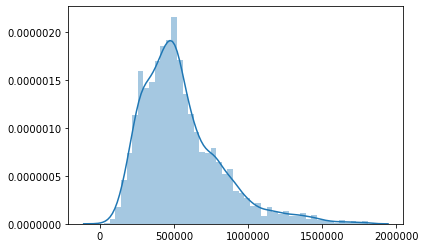

In [8]:
sns.distplot(final_answer)